# Importing Libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler 
import numpy as np
from sklearn.model_selection import train_test_split
import os, cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D

from sklearn.metrics import  precision_score, recall_score, accuracy_score,classification_report 

# Import Data

In [71]:
import pandas as pd
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')
data.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [72]:
y = data['label']
x = data.drop(columns = ['label'])

# Exploratory Data Analysis (EDA)

In [73]:
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
tabular_data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [74]:
tabular_data.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [75]:
classes = {4: ('nv', ' melanocytic nevi'), 6: ('mel', 'melanoma'), 2 :('bkl', 'benign keratosis-like lesions'), 1:('bcc' , ' basal cell carcinoma'), 5: ('vasc', ' pyogenic granulomas and hemorrhage'), 0: ('akiec', 'Actinic keratoses and intraepithelial carcinomae'),  3: ('df', 'dermatofibroma')}

# Frequency Distribution of Classes

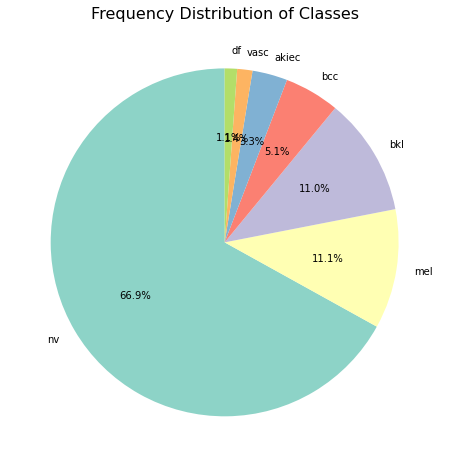

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'tabular_data' is your DataFrame and 'dx' is the column for classes
class_counts = tabular_data['dx'].value_counts()

# Plot the count distribution as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(class_counts)))

# Set a title and display the plot
plt.title('Frequency Distribution of Classes', size=16)
plt.show()


# Distribution of Disease over Gender

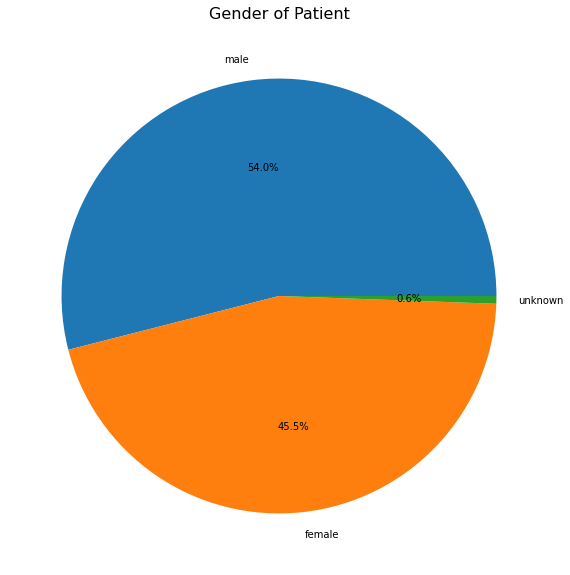

In [77]:
bar, ax = plt.subplots(figsize = (10,10))
plt.pie(tabular_data['sex'].value_counts(), labels = tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender of Patient', size=16)
plt.show()

# Histogram of Age of Patients

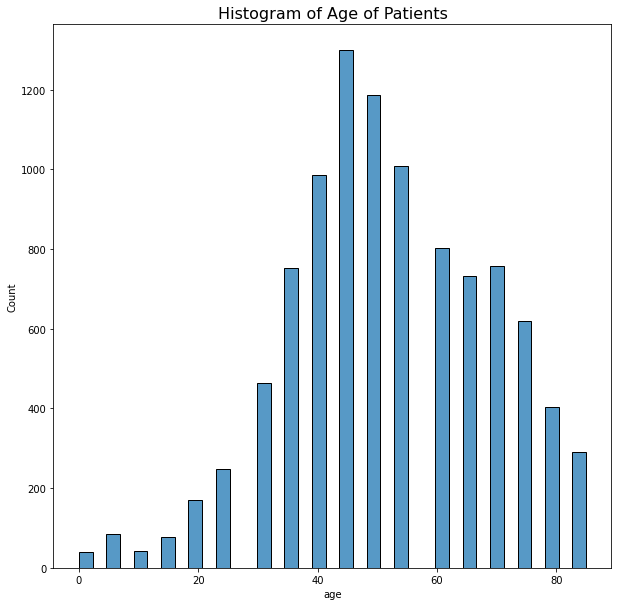

In [78]:
bar, ax = plt.subplots(figsize=(10,10))
sns.histplot(tabular_data['age'])
plt.title('Histogram of Age of Patients', size=16)
plt.show()

# Location of disease over Gender

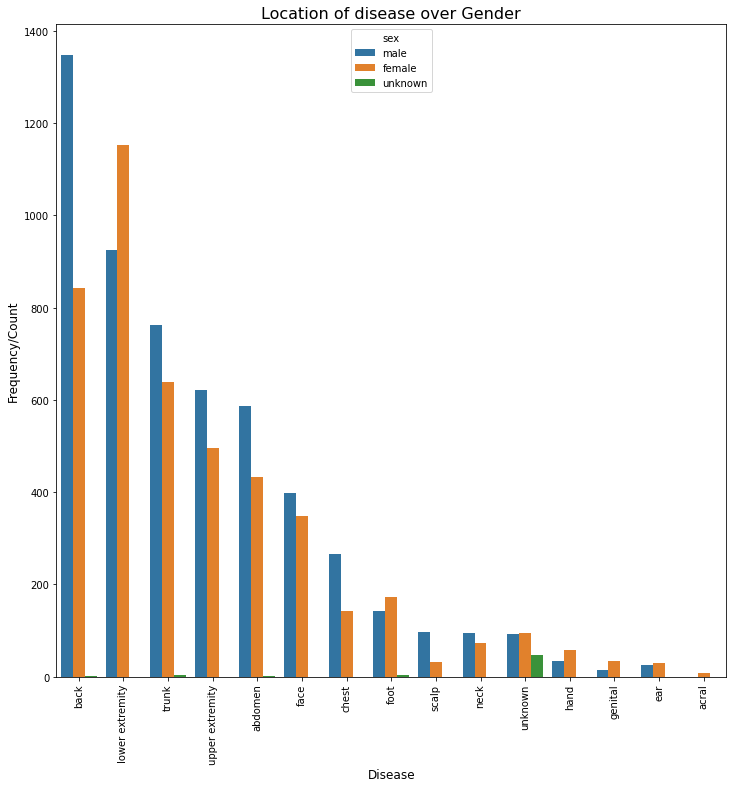

In [79]:
value = tabular_data[['localization', 'sex']].value_counts().to_frame()
value.reset_index(level=[1,0 ], inplace=True)
temp = value.rename(columns = {'localization':'location', 0: 'count'})

bar, ax = plt.subplots(figsize = (12, 12))
sns.barplot(x = 'location',  y='count', hue = 'sex', data = temp)
plt.title('Location of disease over Gender', size = 16)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency/Count', size=12)
plt.xticks(rotation = 90)
plt.show()

# Oversampling
**To overcome class imbalace**

In [80]:
oversample = RandomOverSampler()
x,y  = oversample.fit_resample(x,y)

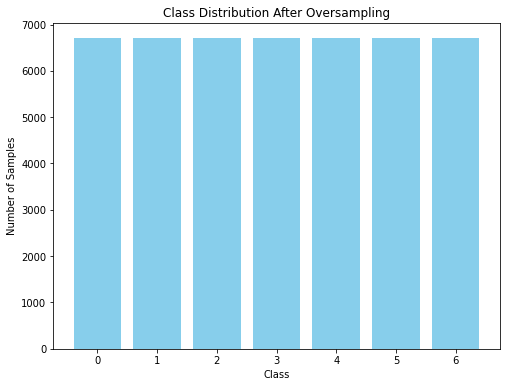

In [81]:
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# Assuming x and y are your features and labels
oversample = RandomOverSampler()
x_resampled, y_resampled = oversample.fit_resample(x, y)

# Count the occurrences of each class in the resampled dataset
class_counts = Counter(y_resampled)

# Plot the distribution of classes after oversampling
plt.figure(figsize=(8, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution After Oversampling')
plt.xticks(range(7))  # Assuming you have 7 classes (0-6)
plt.show()


In [12]:
x = np.array(x).reshape(-1,28,28,3)
print('Shape of X :',x.shape)

Shape of X : (46935, 28, 28, 3)


In [13]:
print('Shape of Y :',y.shape)

Shape of Y : (46935,)


# Standardization and Splitting Data

In [14]:
x = (x-np.mean(x))/np.std(x)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.2, random_state=1)

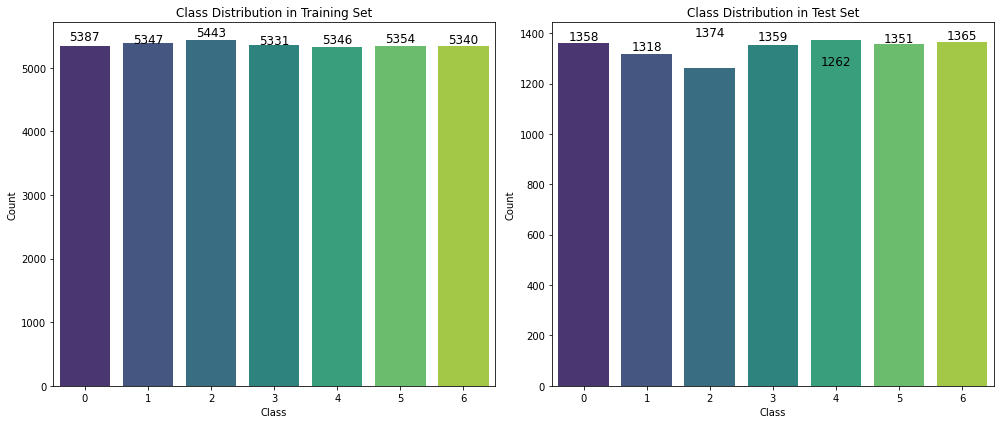

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

# Normalize x (mean 0, std 1)
x = (x - np.mean(x)) / np.std(x)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Get the class distribution in Y_train and Y_test
train_class_dist = Counter(Y_train)
test_class_dist = Counter(Y_test)

# Prepare for plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot distribution of class labels in Y_train
sns.barplot(x=list(train_class_dist.keys()), y=list(train_class_dist.values()), ax=axes[0], palette='viridis')
axes[0].set_title("Class Distribution in Training Set")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
for i, v in enumerate(train_class_dist.values()):
    axes[0].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Plot distribution of class labels in Y_test
sns.barplot(x=list(test_class_dist.keys()), y=list(test_class_dist.values()), ax=axes[1], palette='viridis')
axes[1].set_title("Class Distribution in Test Set")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
for i, v in enumerate(test_class_dist.values()):
    axes[1].text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


# Custom Model

In [15]:
#Soft Attention

from keras import backend as K
from keras.layers import Layer,InputSpec,Input,BatchNormalization,MaxPooling2D,concatenate,Activation,Dropout
import keras.layers as kl
import tensorflow as tf
from tensorflow.keras import Model



class SoftAttention(Layer):
    def __init__(self,ch,m,concat_with_x=False,aggregate=False,**kwargs):
        self.channels=int(ch)
        self.multiheads = m
        self.aggregate_channels = aggregate
        self.concat_input_with_scaled = concat_with_x

        
        super(SoftAttention,self).__init__(**kwargs)

    def build(self,input_shape):

        self.i_shape = input_shape

        kernel_shape_conv3d = (self.channels, 3, 3) + (1, self.multiheads) # DHWC
    
        self.out_attention_maps_shape = input_shape[0:1]+(self.multiheads,)+input_shape[1:-1]
        
        if self.aggregate_channels==False:

            self.out_features_shape = input_shape[:-1]+(input_shape[-1]+(input_shape[-1]*self.multiheads),)
        else:
            if self.concat_input_with_scaled:
                self.out_features_shape = input_shape[:-1]+(input_shape[-1]*2,)
            else:
                self.out_features_shape = input_shape
        

        self.kernel_conv3d = self.add_weight(shape=kernel_shape_conv3d,
                                        initializer='he_uniform',
                                        name='kernel_conv3d')
        self.bias_conv3d = self.add_weight(shape=(self.multiheads,),
                                      initializer='zeros',
                                      name='bias_conv3d')

        super(SoftAttention, self).build(input_shape)

    def call(self, x):

        exp_x = K.expand_dims(x,axis=-1)

        c3d = K.conv3d(exp_x,
                     kernel=self.kernel_conv3d,
                     strides=(1,1,self.i_shape[-1]), padding='same', data_format='channels_last')
        conv3d = K.bias_add(c3d,
                        self.bias_conv3d)
        conv3d = kl.Activation('relu')(conv3d)

        conv3d = K.permute_dimensions(conv3d,pattern=(0,4,1,2,3))

        
        conv3d = K.squeeze(conv3d, axis=-1)
        conv3d = K.reshape(conv3d,shape=(-1, self.multiheads ,self.i_shape[1]*self.i_shape[2]))

        softmax_alpha = K.softmax(conv3d, axis=-1) 
        softmax_alpha = kl.Reshape(target_shape=(self.multiheads, self.i_shape[1],self.i_shape[2]))(softmax_alpha)

        
        if self.aggregate_channels==False:
            exp_softmax_alpha = K.expand_dims(softmax_alpha, axis=-1)       
            exp_softmax_alpha = K.permute_dimensions(exp_softmax_alpha,pattern=(0,2,3,1,4))
   
            x_exp = K.expand_dims(x,axis=-2)
   
            u = kl.Multiply()([exp_softmax_alpha, x_exp])   
  
            u = kl.Reshape(target_shape=(self.i_shape[1],self.i_shape[2],u.shape[-1]*u.shape[-2]))(u)

        else:
            exp_softmax_alpha = K.permute_dimensions(softmax_alpha,pattern=(0,2,3,1))

            exp_softmax_alpha = K.sum(exp_softmax_alpha,axis=-1)

            exp_softmax_alpha = K.expand_dims(exp_softmax_alpha, axis=-1)

            u = kl.Multiply()([exp_softmax_alpha, x])   

        if self.concat_input_with_scaled:
            o = kl.Concatenate(axis=-1)([u,x])
        else:
            o = u
        
        return [o, softmax_alpha]

    def compute_output_shape(self, input_shape): 
        return [self.out_features_shape, self.out_attention_maps_shape]

    
    def get_config(self):
        return super(SoftAttention,self).get_config()
 

In [16]:
MainInput=Input(shape=(28, 28, 3))

conv=(Conv2D(filters=64,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(MainInput))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=64,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D(strides=(2, 2),padding="same")(conv))

conv=(Conv2D(filters=128,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=128,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D()(conv))


conv=(Conv2D(filters=256,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=256,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=256,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D()(conv))

conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

attention_layer,map2 = SoftAttention(aggregate=True,m=16,concat_with_x=False,ch=int(conv.shape[-1]),name='soft_attention')(conv)
attention_layer=(MaxPooling2D(pool_size=(2, 2),padding="same")(attention_layer))
conv=(MaxPooling2D(pool_size=(2, 2),padding="same")(conv))

conv = concatenate([conv,attention_layer])
conv=Activation("relu")(conv)
conv= Dropout(0.5)(conv)

conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D(pool_size=(4, 4),padding="same")(conv))

conv=(Flatten()(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(7, activation="softmax")(conv))



In [17]:
from tensorflow.keras.models import Model
model = Model(inputs=MainInput, outputs=conv)

In [18]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 28, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 28, 28, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 28, 28, 64)   4160        batch_normalization[0][0]        
______________________________________________________________________________________________

In [20]:
from tensorflow.keras.applications import EfficientNetB0,ResNet50,MobileNetV2,ResNet101
from tensorflow.keras import layers

inputs = layers.Input(shape=(28, 28, 3))
model = ResNet101(include_top=False, input_tensor=inputs, weights="imagenet")
model.trainable = False

# Rebuild top
conv = MaxPooling2D(pool_size=(2, 2),padding="same")(model.output)
conv = (BatchNormalization()(conv))


attention_layer,map2 = SoftAttention(aggregate=True,m=16,concat_with_x=False,ch=int(conv.shape[-1]),name='soft_attention')(conv)
attention_layer=(MaxPooling2D(pool_size=(2, 2),padding="same")(attention_layer))
conv=(MaxPooling2D(pool_size=(2, 2),padding="same")(conv))

conv = concatenate([conv,attention_layer])
conv=Activation("relu")(conv)
conv= Dropout(0.5)(conv)

conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(3,3), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))
conv=(Conv2D(filters=512,kernel_size=(1,1), activation="relu",padding="same",kernel_initializer='he_normal')(conv))
conv=(BatchNormalization()(conv))

conv=(MaxPooling2D(pool_size=(4, 4),padding="same")(conv))

conv=(Flatten()(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(4096,activation="relu")(conv))
conv=(Dense(7, activation="softmax")(conv))



171458560/171446536 [==============================] - 5s 0us/step


In [21]:
from tensorflow.keras.models import Model
model = Model(inputs=inputs, outputs=conv,name="ResNet101")
model.summary()


Model: "ResNet101"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 28, 28, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 34, 34, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 14, 14, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 14, 14, 64)   256         conv1_conv[0][0]                 
__________________________________________________________________________________________

# Model Training

In [22]:
# model = Sequential()
# model.add(Conv2D(16, kernel_size = (3,3), input_shape = (28, 28, 3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2)))
# model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding = 'same'))
# model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
# model.add(MaxPool2D(pool_size = (2,2), padding = 'same'))
# model.add(Flatten())
# model.add(Dense(64, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(7, activation='softmax'))
# model.summary()

In [23]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='skin_disease_pred.h5',
                                                  monitor='val_acc', mode='max',
                                                 verbose=1)


In [24]:
Y_train.shape

(37548,)

In [25]:
# model.compile(loss = 'sparse_categorical_crossentropy',
#              optimizer = 'adam',
#               metrics = ['accuracy'])
# history = model.fit(X_train,
#                     Y_train,
#                     validation_split=0.2,
#                     batch_size = 128,
#                     epochs = 20,
#                     callbacks=[callback])
model.compile(loss = 'sparse_categorical_crossentropy',
             optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(X_train,
                    Y_train,
                    validation_split=0.3,
                    batch_size = 128,
                    epochs = 100,
                    callbacks=[callback])

Epoch 1/100
206/206 [==============================] - 45s 110ms/step - loss: 1.6908 - accuracy: 0.3675 - val_loss: 1.5243 - val_accuracy: 0.3999

Epoch 00001: saving model to skin_disease_pred.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
206/206 [==============================] - 17s 81ms/step - loss: 1.4212 - accuracy: 0.4478 - val_loss: 1.2498 - val_accuracy: 0.5395

Epoch 00002: saving model to skin_disease_pred.h5
Epoch 3/100
206/206 [==============================] - 16s 80ms/step - loss: 1.3231 - accuracy: 0.4916 - val_loss: 1.0709 - val_accuracy: 0.6071

Epoch 00003: saving model to skin_disease_pred.h5
Epoch 4/100
206/206 [==============================] - 16s 80ms/step - loss: 1.2504 - accuracy: 0.5164 - val_loss: 1.0359 - val_accuracy: 0.6320

Epoch 00004: saving model to skin_disease_pred.h5
Epoch 5/100
206/206 [==============================] - 16s 80ms/step - loss: 1.1932 - accuracy: 0.5435 - val_loss: 0.9439 - val_accuracy: 0.6466

Epoch 00005: saving model to skin_disease_pred.h5
Epoch 6/100
206/206 [==============================] - 16s 79ms/step - loss: 1.1576 - accuracy: 0.5630 - val_loss: 0.9289 - val_accuracy: 0.6575

Epoch 00006: saving model to skin_disease_pred.h5
Epoch 7/100
206/206 

# Plot Accuracy and Loss

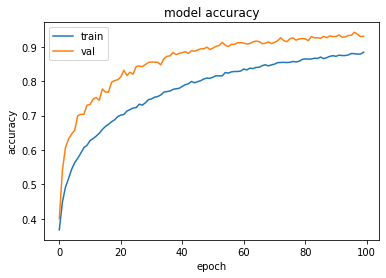

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

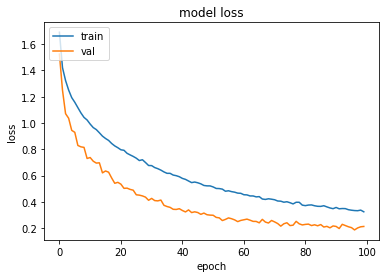

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [42]:
model.load_weights('skin_disease_pred.h5')


In [30]:
classes_labels=[]
for key in classes.keys():
    classes_labels.append(key)
print(classes_labels)


[4, 6, 2, 1, 5, 0, 3]


In [31]:
from sklearn.metrics import confusion_matrix , classification_report


In [32]:
y_true = np.array(Y_test)
y_pred = model.predict(X_test)
y_pred = np.array(list(map(lambda x: np.argmax(x), y_pred)))
print(y_true)
print(y_pred)


[5 1 4 ... 2 6 0]
[5 1 4 ... 2 6 0]


In [33]:
pred=model.predict(X_test)
pred

array([[3.19915472e-09, 1.41334615e-08, 2.71297779e-07, ...,
        1.32324194e-05, 9.99984503e-01, 1.98756493e-06],
       [5.45711430e-07, 9.83866155e-01, 6.70829904e-04, ...,
        1.12981526e-02, 2.50235498e-05, 4.13912674e-03],
       [1.18033066e-04, 1.56409413e-04, 3.58702302e-01, ...,
        6.23063385e-01, 4.36038827e-04, 1.74267441e-02],
       ...,
       [3.92564107e-05, 1.06075036e-04, 9.94809747e-01, ...,
        3.67708225e-03, 1.02951788e-07, 1.36403937e-03],
       [9.84690341e-05, 2.95193640e-05, 6.43112464e-03, ...,
        3.46616167e-03, 9.70371389e-07, 9.89834070e-01],
       [1.00000000e+00, 1.51756233e-10, 4.35988246e-10, ...,
        2.12483009e-09, 2.30565608e-15, 2.30896031e-12]], dtype=float32)

In [34]:
classes_labels

[4, 6, 2, 1, 5, 0, 3]

In [35]:
report = classification_report(y_true, y_pred)

print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      1359
           1       0.94      0.99      0.96      1318
           2       0.89      0.92      0.90      1262
           3       0.98      0.99      0.98      1351
           4       0.94      0.66      0.77      1374
           5       0.98      1.00      0.99      1358
           6       0.86      0.96      0.90      1365

    accuracy                           0.93      9387
   macro avg       0.93      0.93      0.93      9387
weighted avg       0.93      0.93      0.92      9387



In [36]:
cm=confusion_matrix(y_true,y_pred,labels=classes_labels)
print(confusion_matrix(y_true,y_pred,labels=classes_labels))


[[ 901  198  132   51   25   42   25]
 [  26 1306   16    5    4    8    0]
 [  27   19 1156   32    2   23    3]
 [   0    0    0 1304    0    9    5]
 [   0    0    0    0 1358    0    0]
 [   0    0    0    0    0 1359    0]
 [   0    0    0    0    0   19 1332]]


<AxesSubplot:>

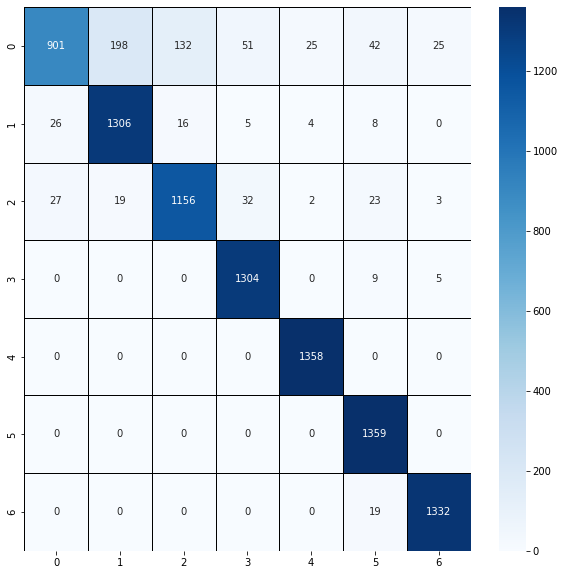

In [41]:
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

# Model Testing

In [38]:
loss, acc = model.evaluate(X_test, Y_test, verbose=2)

294/294 - 10s - loss: 0.2186 - accuracy: 0.9285


# Model Inference

In [ ]:

+